<b>IMPORTING REQUIRED MODULES</b>

In [57]:
%matplotlib inline
import mpld3 #need to install with "pip install mpld3"
mpld3.enable_notebook()
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn styles for nice-looking plots
import seaborn; seaborn.set()

import time
import sys
import glob


import ipywidgets as widgets
from ipywidgets import Layout, interact, fixed

"""
Using IPython File Upload: 
https://github.com/peteut/ipython-file-upload
pip install fileupload
jupyter nbextension install --py fileupload
jupyter nbextension enable --py fileupload
"""
import io
from IPython.display import display
import fileupload

import pickle
import scipy
from scipy.optimize import leastsq

In [2]:
data_directory = "E:\\rotifer data\\"

2 Length 100000
FS: 10000
3 Length 100000
FS: 10000
4 Length 100000
FS: 10000
5 Length 100000
FS: 10000
6 Length 100000
FS: 10000
7 Length 100000
FS: 10000
8 Length 100000
FS: 10000
9 Length 100000
FS: 10000
10 Length 100000
FS: 10000
11 Length 100000
FS: 10000
12 Length 100000
FS: 10000
13 Length 100000
FS: 10000
14 Length 100000
FS: 10000


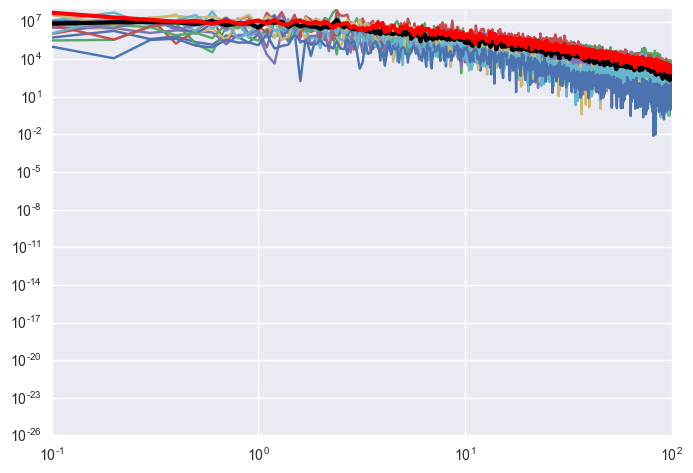

In [86]:
ps_0s = []
ps_1s = []
fig1,ax1 = plt.subplots()
for i in range(2,15):
    
    saved_data_ps = pickle.load(open(data_directory+"rotifer"+str(i)+".p",'r'))
    print "%i Length %i" % (i, len(saved_data_ps['inputData_0']))
    print "FS: %i" % saved_data_ps['Fs']
    ps_0 = np.abs(np.fft.fft(saved_data_ps['inputData_0']-saved_data_ps['inputData_0'].mean()))**2
    ps_1 = np.abs(np.fft.fft(saved_data_ps['inputData_1']-saved_data_ps['inputData_1'].mean()))**2
    time_step = 1./saved_data_ps['Fs']
    freqs = np.fft.fftfreq(len(saved_data_ps['inputData_0']), time_step)
    idx = np.argsort(freqs)
    ax1.loglog(freqs[:1000], ps_0[:1000])
    ps_0s.append(ps_0)
    ps_1s.append(ps_1)

ps_0s = np.array(ps_0s)
ps_1s = np.array(ps_1s)

#ax1.plot(freqs[:1000], scipy.ndimage.gaussian_filter1d(ps_0s.mean(axis=0)[:1000],1))
#ax1.plot(freqs[:1000], scipy.ndimage.gaussian_filter1d(ps_1s.mean(axis=0)[:1000],1))

ax1.plot(freqs[:1000], ps_0s.mean(axis=0)[:1000],'-k',lw=3)
ax1.plot(freqs[:1000], ps_1s.mean(axis=0)[:1000],'-r',lw=3)

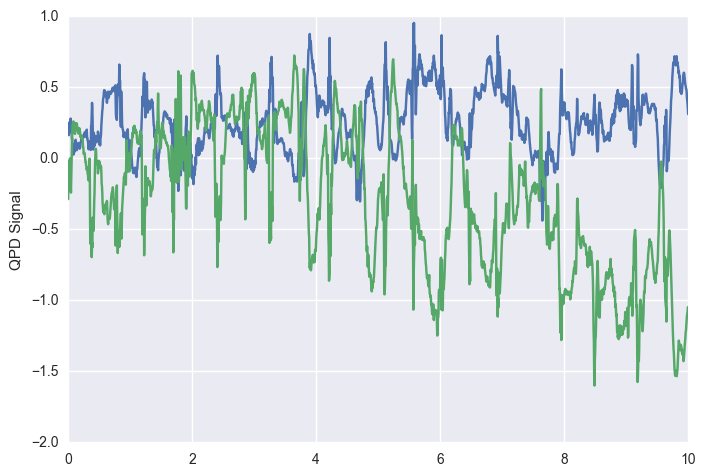

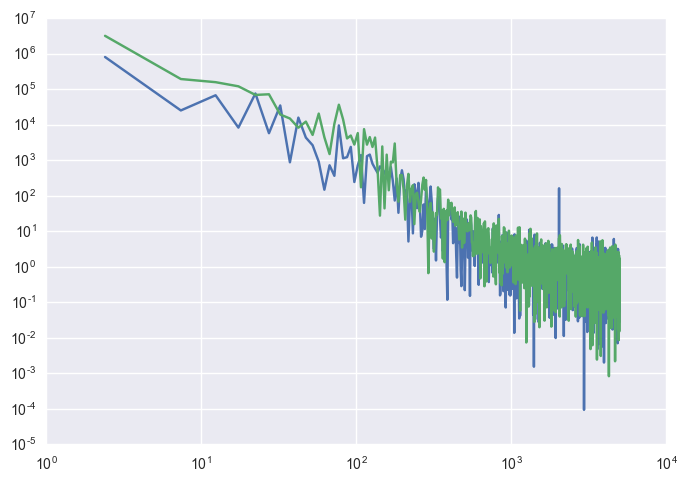

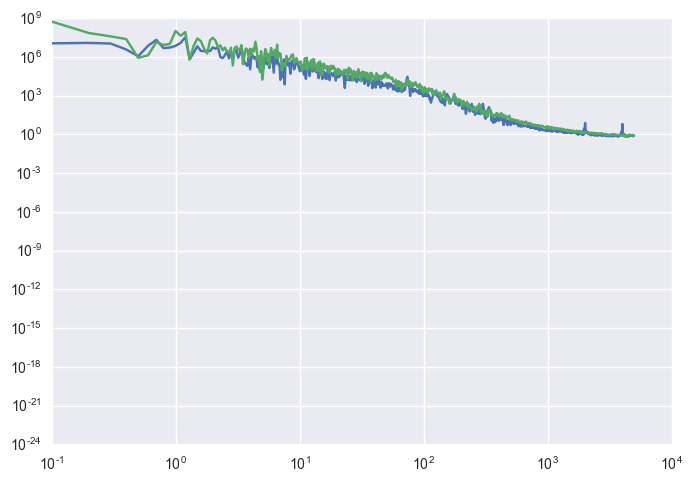

In [63]:
saved_data_ps = pickle.load(open(data_directory+"rotifer8.p",'r'))

start_pt = 0
plt_points = np.linspace(start_pt,len(saved_data_ps['inputData_0'])-1,min(2000,len(saved_data_ps['inputData_0'])),dtype=np.int)
data_time = np.arange(0,len(saved_data_ps['inputData_0']))/saved_data_ps['Fs']
fig,ax1 = plt.subplots()
ax1.plot(data_time[plt_points], saved_data_ps['inputData_0'][plt_points])
ax1.plot(data_time[plt_points], saved_data_ps['inputData_1'][plt_points])
ax1.set_ylabel("QPD Signal")

ps_0 = np.abs(np.fft.fft(saved_data_ps['inputData_0']-saved_data_ps['inputData_0'].mean()))**2
ps_1 = np.abs(np.fft.fft(saved_data_ps['inputData_1']-saved_data_ps['inputData_1'].mean()))**2
time_step = 1./saved_data_ps['Fs']
freqs = np.fft.fftfreq(len(saved_data_ps['inputData_0']), time_step)
idx = np.argsort(freqs)
fig2,ax2 = plt.subplots()
ax2.loglog(freqs[idx][plt_points], ps_0[idx][plt_points])
ax2.loglog(freqs[idx][plt_points], ps_1[idx][plt_points])

binning = np.geomspace(1,10000,num=1024,endpoint=False,dtype=np.int)
freqs_new = []; ps_0_new = []; ps_1_new = []
freqs_used = freqs[idx][len(freqs)/2:]
ps_0_used = ps_0[idx][len(freqs)/2:]
ps_1_used = ps_1[idx][len(freqs)/2:]
j=0
for i,space in enumerate(binning):
    if j<len(freqs_used):
        freqs_new.append(freqs_used[j:j+space].mean())
        ps_0_new.append(ps_0_used[j:j+space].mean())
        ps_1_new.append(ps_1_used[j:j+space].mean())
        j=j+space
    else:
        break

freqs_new = np.array(freqs_new); ps_0_new = np.array(ps_0_new); ps_1_new = np.array(ps_1_new)
fig4,ax4 = plt.subplots()
ax4.loglog(freqs_new, ps_0_new)
ax4.loglog(freqs_new, ps_1_new)

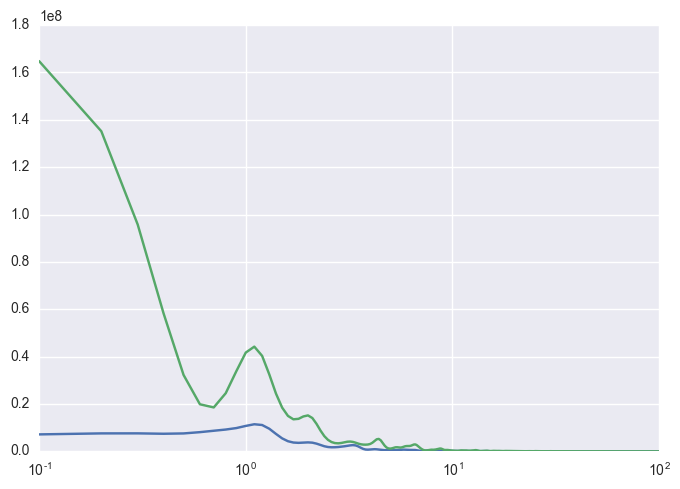

In [64]:
fig2,ax2 = plt.subplots()
ax2.semilogx(freqs[:1000], scipy.ndimage.gaussian_filter1d(ps_0[:1000],2))
ax2.semilogx(freqs[:1000], scipy.ndimage.gaussian_filter1d(ps_1[:1000],2))